In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

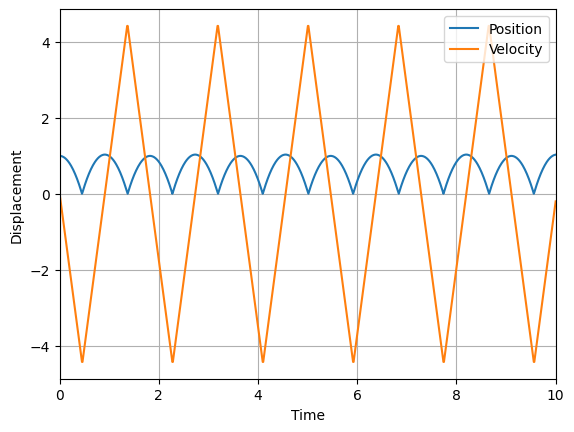

In [40]:
N = 1000
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, np.abs(x), label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

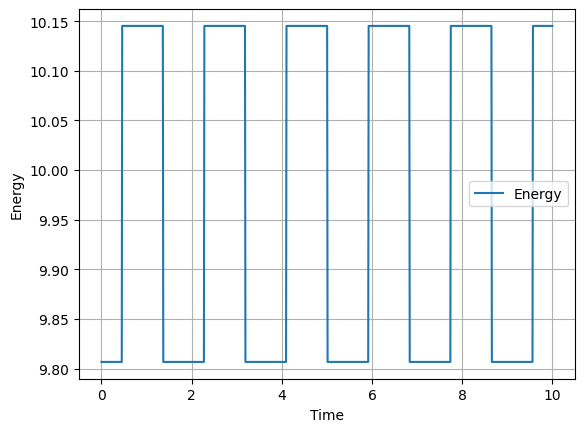

In [41]:
H = 0.5 * v **2 + const.g * np.abs(x)

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

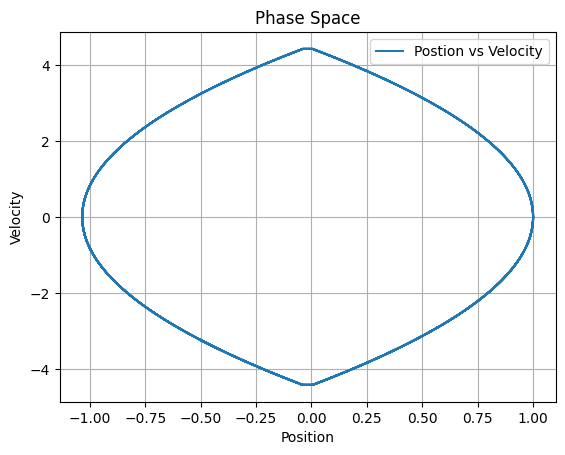

In [42]:
plt.figure()
plt.plot(x, v, label = 'Postion vs Velocity')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

## New Force

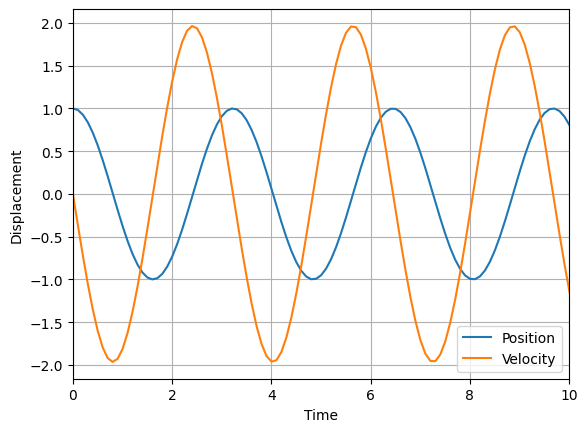

In [43]:
N = 1000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def leapfrog(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x, v = leapfrog(x0, v0, x_s, dt, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

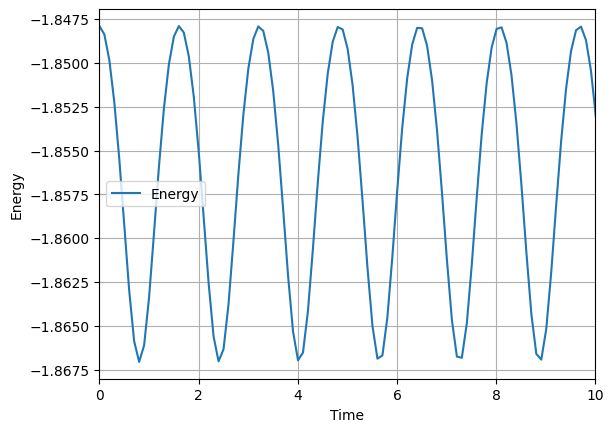

In [44]:
H = 0.5 * v**2 + -const.g/np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

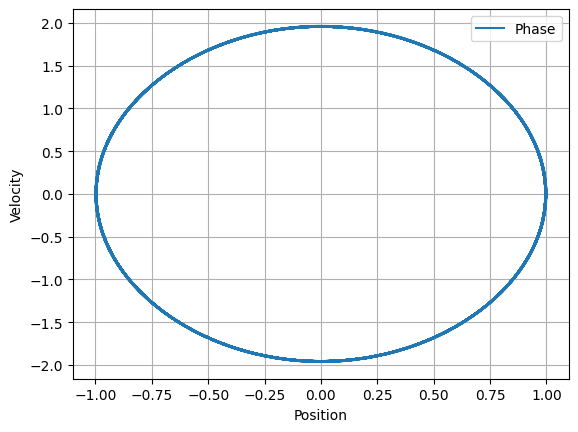

In [45]:
plt.figure()
plt.plot(x, v, label = 'Phase')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

# Solutions Comparison

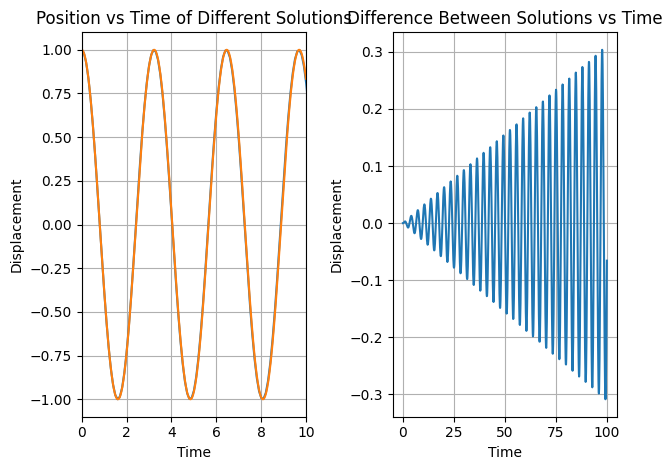

In [46]:
# Parameters
x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)


def numerical_solution(x0, v0, x_s):
    N = 1000
    t = np.linspace(0,100,N) 
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x, v


def estimated_analytical_solution(x0, v0, x_s):
    N = 100000
    t = np.linspace(0,100,N)
    dt = t[1]-t[0]

    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x ,v

t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s)
t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s)

plt.figure()

plt.subplot(1,2,1)
plt.plot(t_numerical, x_numerical, label = 'Numerical Position')
plt.plot(t_estimate, x_estimate, label = 'Estimated Analytic Position')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Position vs Time of Different Solutions')
plt.grid()

from scipy.interpolate import interp1d # Interpolates the data for the estimate as their is a dimensional difference for the time as it uses the different stepsizes.
x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, x_estimate_interp - x_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

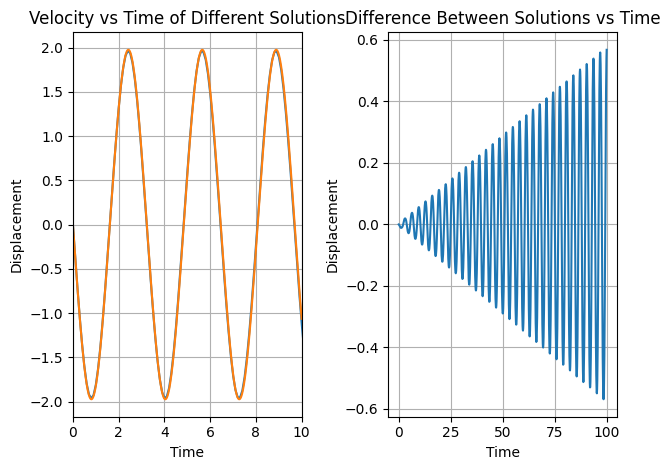

In [47]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(t_numerical, v_numerical, label = 'Numerical Velocity')
plt.plot(t_estimate, v_estimate, label = 'Estimated Analytic Velocity')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Velocity vs Time of Different Solutions')
plt.grid()

from scipy.interpolate import interp1d
v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, v_estimate_interp - v_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

# Variable Step Size

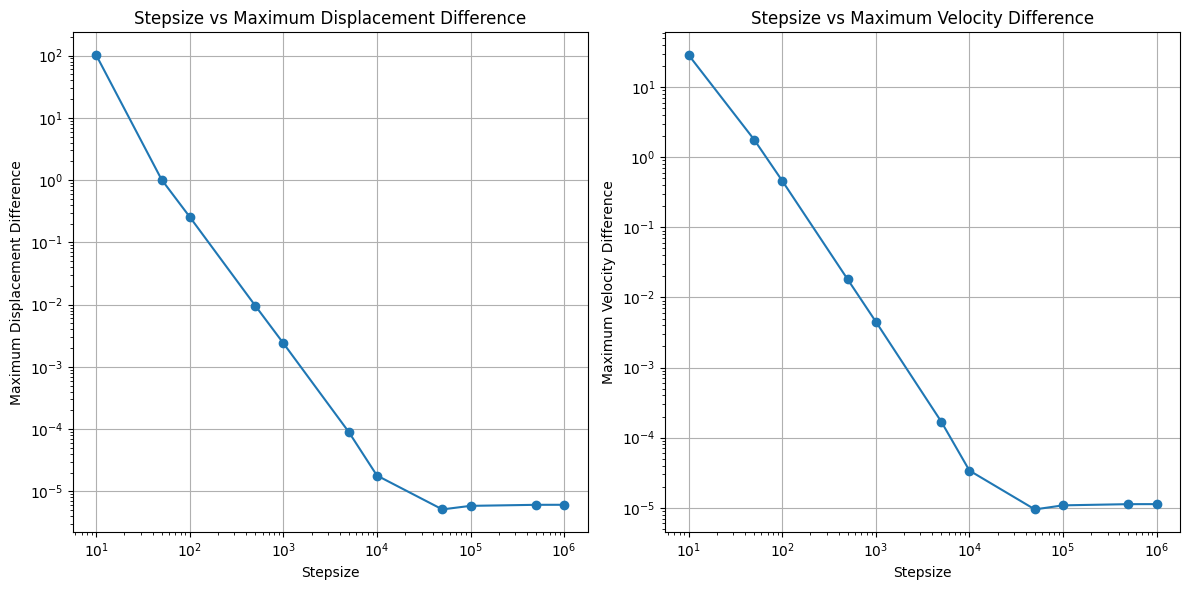

In [48]:
orbits = 10
x0 = 1
v0 = 0
x_s = 1.5
T = 2 * np.pi * np.sqrt(x0/const.g) # Time per orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, h, T):
    t_final = orbits * T  
    t = np.linspace(0, t_final, h)
    dt = t[1] - t[0]
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

def estimated_analytical_solution(x0, v0, x_s):
    h = 100000
    t = np.linspace(0, 100, h)
    dt = t[1] - t[0]

    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

def calculate_max_difference(stepsizes):
    max_differences = []
    max_velocity_differences = []

    t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s)
    
    for h in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, h, T)
        x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)
        v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)
        
        max_difference = np.max(np.abs(x_estimate_interp - x_numerical))
        max_differences.append(max_difference)

        max_velocity_difference = np.max(np.abs(v_estimate_interp - v_numerical))
        max_velocity_differences.append(max_velocity_difference)

    return max_differences, max_velocity_differences

stepsizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000] 
max_differences, max_velocity_differences = calculate_max_difference(stepsizes)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stepsizes, max_differences, marker='o')
plt.xlabel('Stepsize')
plt.ylabel('Maximum Displacement Difference')
plt.title('Stepsize vs Maximum Displacement Difference')
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(stepsizes, max_velocity_differences, marker='o')
plt.xlabel('Stepsize')
plt.ylabel('Maximum Velocity Difference')
plt.title('Stepsize vs Maximum Velocity Difference')
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()